In [2]:
from datetime import timedelta
import time

In [10]:
from datetime import datetime, timedelta
import requests
import pandas as pd

In [7]:
API_KEY = "rMI8JTSC2e2Z3bCoSirfQtmGvoHDcs7T6qjyJidK"  # 🔑 Replace with your key

In [11]:
daily_counts = []

# Loop from 30 days ago to today
for i in range(30, 0, -1):
    start = (datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d')
    end = (datetime.today() - timedelta(days=i-1)).strftime('%Y-%m-%d')
    
    url = f"https://api.nasa.gov/neo/rest/v1/feed?start_date={start}&end_date={end}&api_key={API_KEY}"
    res = requests.get(url)
    
    if res.status_code == 200:
        data = res.json()
        count = sum(len(data['near_earth_objects'][d]) for d in data['near_earth_objects'])
        daily_counts.append({'date': start, 'count': count})
    else:
        print(f"Failed on {start}")
        daily_counts.append({'date': start, 'count': None})
    
    time.sleep(1)  # API rate limit

# Convert to DataFrame
ts_df = pd.DataFrame(daily_counts)
ts_df['date'] = pd.to_datetime(ts_df['date'])

# Save for backup
ts_df.to_csv("neo_timeseries.csv", index=False)
ts_df.head()


,date,count
0,2025-05-25,30
1,2025-05-26,28
2,2025-05-27,27
3,2025-05-28,25
4,2025-05-29,25


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ojass\AppData\Local\Temp\ipykernel_18992\892052467.py:8: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ojass\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


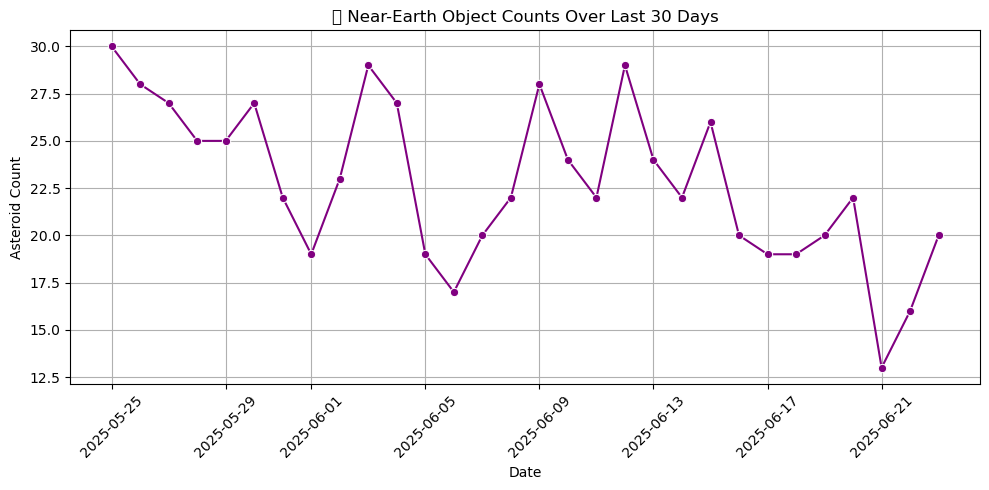

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='count', data=ts_df, marker='o', color='purple')
plt.title("🛰️ Near-Earth Object Counts Over Last 30 Days")
plt.xlabel("Date")
plt.ylabel("Asteroid Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
#FORCAST

In [15]:
from prophet import Prophet

# Prepare data
prophet_df = ts_df.rename(columns={'date': 'ds', 'count': 'y'}).dropna()

# Instantiate and fit model
model = Prophet()
model.fit(prophet_df)


01:32:45 - cmdstanpy - INFO - Chain [1] start processing
01:32:47 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Future 15 days
future = model.make_future_dataframe(periods=15)

# Predict
forecast = model.predict(future)

c:\Users\ojass\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


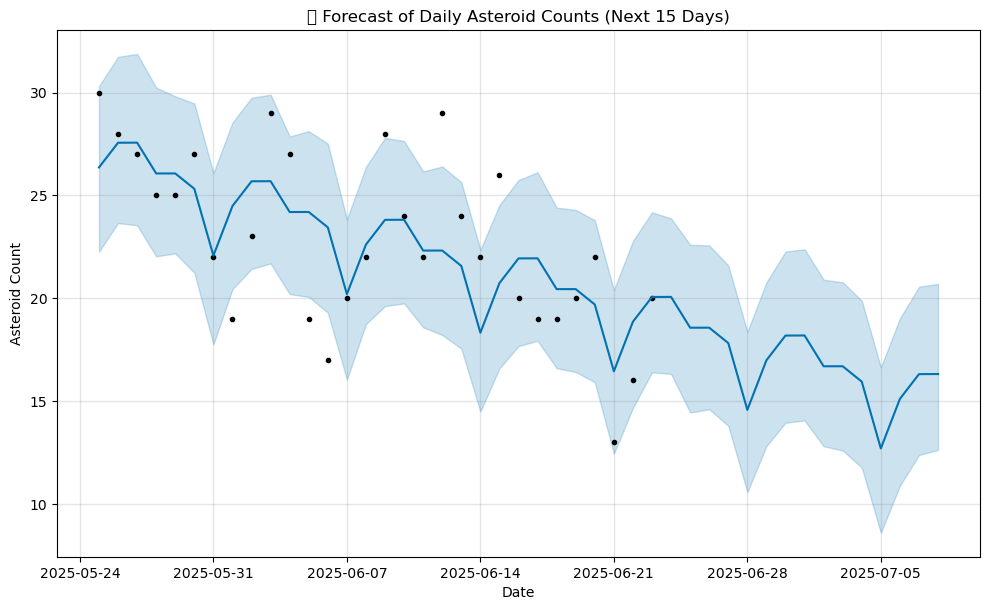

In [17]:
# Plot forecast
fig = model.plot(forecast)
plt.title("🚀 Forecast of Daily Asteroid Counts (Next 15 Days)")
plt.xlabel("Date")
plt.ylabel("Asteroid Count")
plt.grid(True)
plt.show()


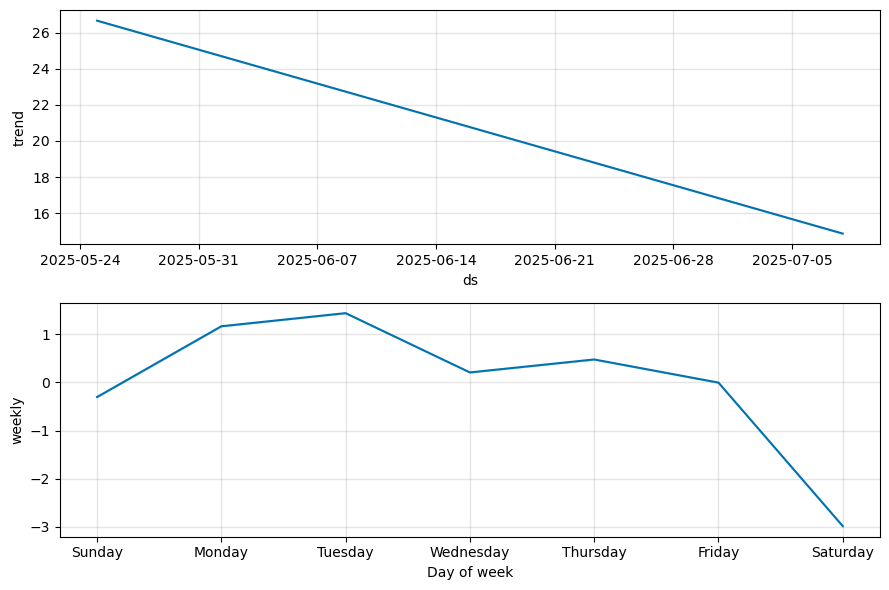

In [18]:
model.plot_components(forecast)
plt.show()